The positions of the ball were recorded manually with positionTaker.py and written to a CSV file, see positionTaker.py


![Ball](data/ballFoto.png)

The first goal was to calculate the throw distance, flight time and the equation of motion and to compare this with the measured values ​​or Kalman values ​​(in 2D)
FYI: the ball moves from right to left in the video and vice versa in the formulary. The principle remains the same.

![Wurfparabel](data/Wurfparabel.png)


In [1]:
from kalmanfilter import KalmanFilter
import cv2 as cv
import csv 
import matplotlib.pyplot as plt
import math
file = open('data/ballPosition.csv')
kf = KalmanFilter()

In [2]:
x_ball = []
y_ball = []
csvreader = csv.reader(file)
for row in csvreader:
    if(row != ['x;y']):
        rc = row[0]
        row = rc.split(";")
        x_ball.append(int(row[0]))
        y_ball.append(int(row[1]))


In [3]:
x_kal = []
y_kal = []
for i in range(len(x_ball)):
    predicted = kf.predict(x_ball[i], y_ball[i])
    x_kal.append(int(predicted[0]))
    y_kal.append(int(predicted[1]))


# both points are KF estimated points not measured points
y_0 = (x_kal[43],y_kal[43])               
thePointAfter_y_0 = (x_kal[44],y_kal[44])

# video was taken with 151.51 fps, see videos properties in detail, so the the for 2 frames is s = 2/157.51 in seconds
s = 2/157.51

# distance between two frames in px
m = math.sqrt(math.pow(y_0[0] - thePointAfter_y_0[0],2) + math.pow(y_0[1] - thePointAfter_y_0[1],2))

#launch angle
alpha = math.asin(abs(y_0[1] - thePointAfter_y_0[1])/m)

# we assumed that one meter in real world would correspond to 790 pixels. So acceleration due to gravity in px/s^2. It would be more accurate with camera calibration.
g = 9.81*790

# speed in px/s
v_0 = m / s

# equation of motion from the formulary dependent on the time
x_t = [y_0[0] - v_0*math.cos(alpha)*0.0001*i for i in range(0,4300)]
y_t = [-0.5*g*math.pow(0.0001*i,2) + v_0*0.0001*i*math.sin(alpha) + y_0[1] for i in range(0,4300)]

# constants
c_1 = (2*y_0[1]*g)/math.pow(v_0,2)
c_2 = v_0*v_0/g

flightTimeForm_y_0 = v_0/g*abs(math.sin(alpha) +  math.sqrt(math.pow(math.sin(alpha),2)+c_1))
throwDistance =c_2 * math.cos(alpha)*abs(math.sin(alpha) + math.sqrt((math.sin(alpha)*math.sin(alpha))+ c_1))
totalFlightTime = len(x_ball)/157.51

print("Flight time from beginning until the end:",totalFlightTime)
print("Flight time from y_0 until the end:",flightTimeForm_y_0)
print("The total distance, i.e. from the first impact to the landing point (measuring points):",math.sqrt(math.pow(x_ball[0] - x_ball[-1],2) +  math.pow(y_ball[0] - y_ball[-1],2)), "px")
print("Throw distance according to the formula:",throwDistance,"px")
print("The distance from the estimated point with KF to the end:",math.sqrt(math.pow(x_ball[0] - x_ball[-1],2) +  math.pow(y_ball[0] - y_ball[-1],2))-abs(y_0[0]-x_ball[0]), "px")
print("The difference is",9,"px or",900/790,"cm (in 2D)")

Flight time from beginning until the end: 0.6793219478128373
Flight time from y_0 until the end: 0.45460343411123544
The total distance, i.e. from the first impact to the landing point (measuring points): 768.4744628157789 px
Throw distance according to the formula: 465.4298148945945 px
The distance from the estimated point with KF to the end: 454.4744628157789 px
The difference is 9 px or 1.139240506329114 cm (in 2D)


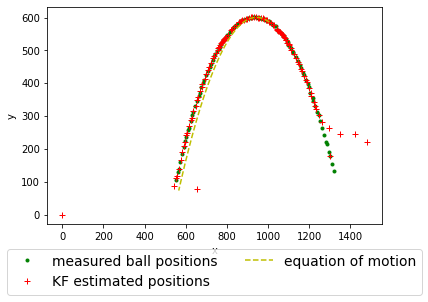

In [4]:
# at the begining estimates KF very bad. For plotting the points it is better to delete this point
# x_kal[0]
#del y_kal[0]

plt.plot(x_ball,y_ball,'g.', label = "measured ball positions")
plt.plot(x_kal,y_kal,'r+', label = "KF estimated positions")
plt.plot(x_t,y_t,'y--', label = "equation of motion")
plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='upper center', prop={'size':13.89}, 
           bbox_to_anchor=(0.5, -0.08), ncol=2)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.show()